# Importacion de librerias

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from collections import defaultdict
import shutil
import nibabel as nib

In [29]:
demographic_data = pd.read_csv(r'C:\Users\santi\Desktop\Tumor_segmetation\Data\UPENN-GBM_clinical_info.csv')
acquisition_data = pd.read_csv(r'C:\Users\santi\Desktop\Tumor_segmetation\Data\UPENN-GBM_acquisition.csv')



# Análisis demográfico

In [24]:
demographic_data.describe()

,Age_at_scan_years,PsP_TP_score
count,671.000000,60.000000
mean,62.464978,4.433333
std,12.365078,1.533432
min,18.650000,1.000000
25%,55.260000,3.000000
50%,63.020000,5.000000
75%,71.250000,6.000000
max,88.500000,6.000000


In [25]:
demographic_data.describe(include=[object])

,ID,Gender,Survival_from_surgery_days_UPDATED,Survival_Status,Survival_Censor,IDH1,MGMT,KPS,GTR_over90percent,Time_since_baseline_preop
count,671,671,671,671,671,671,671,671,671,671
unique,671,2,472,4,28,3,4,8,4,51
top,UPENN-GBM-00001_11,M,Not Available,Deceased,Not Available,Wildtype,Not Available,Not Available,Y,0
freq,1,405,27,644,644,546,348,596,362,611


## Distribución de géneros

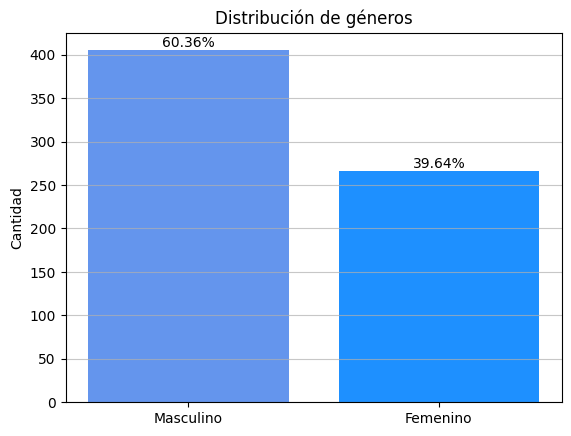

In [32]:
conteo_genero = demographic_data['Gender'].value_counts()
porcentajes = conteo_genero / conteo_genero.sum() * 100
# Crear el diagrama de barras
fig, ax = plt.subplots()
bars = ax.bar(conteo_genero.index, conteo_genero.values, color=['cornflowerblue','dodgerblue'])

# Añadir los porcentajes en la parte superior de las barras
for bar, porcentaje in zip(bars, porcentajes):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{porcentaje:.2f}%', va='bottom', ha='center')  # ha='center' para centrar el texto

# Añadir etiquetas y título
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de géneros')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Masculino', 'Femenino'])

# Añadir grid vertical
ax.grid(axis='y', alpha=0.7)

# Mostrar el gráfico
plt.show()

## Distribución de edades

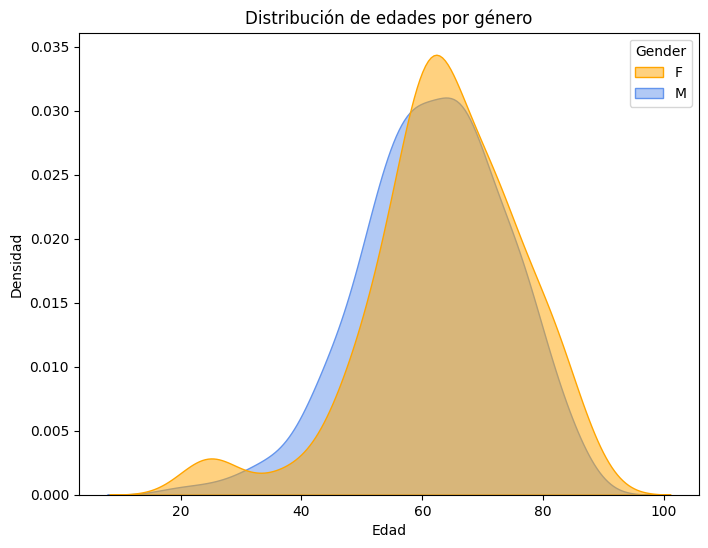

In [21]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=demographic_data, x='Age_at_scan_years', hue='Gender', fill=True, common_norm=False, palette={'M': 'cornflowerblue', 'F': 'orange'}, alpha=0.5)

# Añadir etiquetas y título
plt.title('Distribución de edades por género')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

# Análisis de adquisición

In [53]:
acquisition_data.describe()

,Magnetic Field Strength,T1 Imaging Frequency,T1 Repetition Time,T1 Echo Time,T1 Inversion Time,T1 Flip Angle,T1 Slice Thickness,T1GD Imaging Frequency,T1GD Repetition Time,T1GD Echo Time,...,DTI Imaging Frequency,DTI Repetition Time,DTI Echo Time,DTI Flip Angle,DTI Slice Thickness,DSC Imaging Frequency,DSC Repetition Time,DSC Echo Time,DSC Flip Angle,DSC Slice Thickness
count,671.000000,671.000000,671.000000,671.000000,602.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,591.000000,591.000000,591.000000,591.0,591.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,2.834417,116.712265,1621.905675,4.112182,939.285714,22.086438,1.380775,116.712399,1665.528814,3.625118,...,121.842105,5079.267343,87.578680,90.0,3.035533,121.699395,1993.838951,45.137453,89.634831,3.319663
std,0.470176,18.711149,390.947031,3.314846,56.718250,22.150806,1.145075,18.710825,320.651218,2.609326,...,9.084872,539.783996,5.423129,0.0,0.272321,9.550256,40.141171,1.481259,4.310594,0.634061
min,1.500000,63.469921,5.536000,1.336000,600.000000,8.000000,0.900000,63.469921,5.522000,1.316000,...,63.535506,3100.000000,83.000000,90.0,2.500000,63.535529,1440.000000,30.000000,35.000000,3.000000
25%,3.000000,123.256477,1760.000000,3.110000,950.000000,15.000000,1.000000,123.256479,1760.000000,3.100000,...,123.256510,5000.000000,86.000000,90.0,3.000000,123.256545,2000.000000,45.000000,90.000000,3.000000
50%,3.000000,123.256651,1760.000000,3.110000,950.000000,15.000000,1.000000,123.256652,1760.000000,3.110000,...,123.256630,5000.000000,86.000000,90.0,3.000000,123.256661,2000.000000,45.000000,90.000000,3.000000
75%,3.000000,123.256904,1760.000000,3.110000,950.000000,15.000000,1.000000,123.256907,1760.000000,3.110000,...,123.256894,5000.000000,86.000000,90.0,3.000000,123.256924,2000.000000,45.000000,90.000000,3.000000
max,3.000000,127.744284,2200.000000,20.000000,950.000000,160.000000,5.000000,127.744291,2200.000000,20.000000,...,123.263098,8000.000000,121.000000,90.0,5.000000,127.744080,2000.000000,54.000000,90.000000,5.000000


In [54]:
acquisition_data.describe(include=[object])

,ID,Manufacturer,Model,T1 Pixel Spacing,T1GD Pixel Spacing,T2 Pixel Spacing,FLAIR Pixel Spacing,DTI Pixel Spacing,DSC Pixel Spacing
count,671,671,669,671,671,671,671,591,534
unique,671,2,16,17,15,25,23,5,5
top,UPENN-GBM-00001_11,SIEMENS,TrioTim,0.9765625\0.9765625,0.9765625\0.9765625,0.9375\0.9375,0.9375\0.9375,1.71875\1.71875,1.71875\1.71875
freq,1,663,523,523,547,439,509,571,519


## Análisis de la fuerza del campo magnético

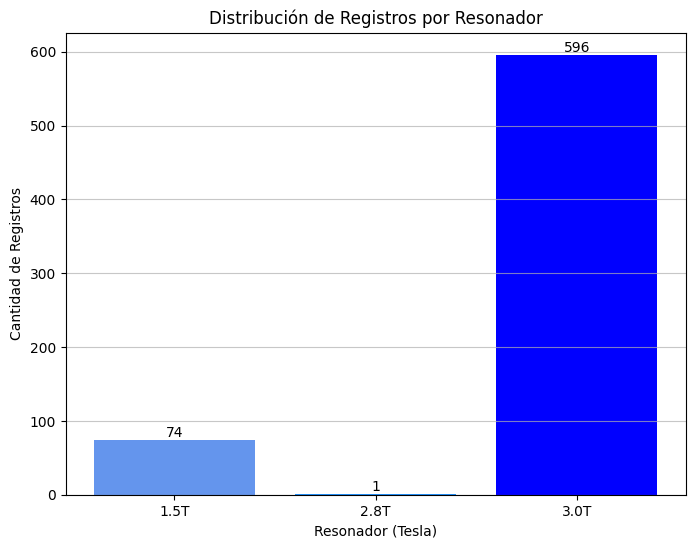

In [52]:
conteo_resonadores = acquisition_data['Magnetic Field Strength'].value_counts().sort_index()

# Crear el diagrama de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(['1.5T', '2.8T', '3.0T'], conteo_resonadores.values, color=['cornflowerblue','dodgerblue','blue'])

# Añadir etiquetas de datos sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Resonador (Tesla)')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Registros por Resonador')
plt.grid(axis='y', alpha=0.7)

# Mostrar el gráfico
plt.show()


# Análisis de datos disponibles

Moviendo la carpeta del sujeto: UPENN-GBM-00001_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00002_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00003_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00004_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00005_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00006_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00007_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00008_11 a C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask
Moviendo la carpeta del sujeto: UPENN-GBM-00009_11 a C:\Users\santi\Desktop\Tumo

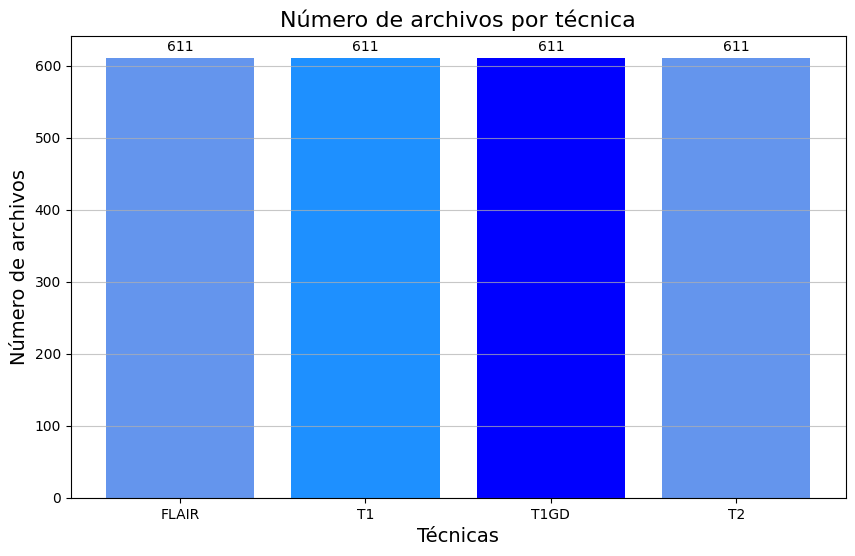

Proceso completado.


In [15]:
import os
import shutil
import matplotlib.pyplot as plt
from collections import defaultdict

# Directorio principal que contiene las carpetas de sujetos
main_folder = r'C:\Users\santi\Desktop\Tumor_segmetation\Data\images_structural_prep'

# Carpeta donde se guardarán los sujetos que terminan en '11'
output_folder = r'C:\Users\santi\Desktop\Tumor_segmetation\Data\subjects_w_mask'
os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Técnicas esperadas
expected_techniques = ["FLAIR", "T1", "T1GD", "T2"]

# Diccionario para contar cuántos archivos hay por técnica
technique_counts = defaultdict(int)

# Recorrer la carpeta principal
for subject_folder in os.listdir(main_folder):
    subject_path = os.path.join(main_folder, subject_folder)
    
    if os.path.isdir(subject_path):  # Verificar que sea una carpeta
        # Verificar si el nombre del sujeto no termina en '11'
        if subject_folder.endswith("11"):
            # Mover las carpetas que terminan en '11' a la carpeta 'subjects_w_mask'
            dest_path = os.path.join(output_folder, subject_folder)
            print(f"Moviendo la carpeta del sujeto: {subject_folder} a {output_folder}")
            shutil.move(subject_path, dest_path)  # Mover la carpeta

            # Contar las técnicas en la carpeta del sujeto
            subject_files = os.listdir(dest_path)
            for technique in expected_techniques:
                for file in subject_files:
                    if technique in file:  # Buscar si la técnica está en el nombre del archivo
                        technique_counts[technique] += 1
                        break

# Crear gráfico de barras con la cuenta de archivos por técnica
fig, ax = plt.subplots(figsize=(10, 6))  # Ajustar el tamaño del gráfico (ancho=10, alto=6)
bars = ax.bar(technique_counts.keys(), technique_counts.values(), color=['cornflowerblue','dodgerblue','blue'])

# Agregar etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento hacia arriba
                textcoords="offset points",
                ha='center', va='bottom')

# Etiquetas y título del gráfico
plt.xlabel('Técnicas', fontsize=14)
plt.ylabel('Número de archivos', fontsize=14)
plt.title('Número de archivos por técnica', fontsize=16)
plt.grid(axis='y', alpha=0.7)
# Mostrar gráfico
plt.show()

print("Proceso completado.")



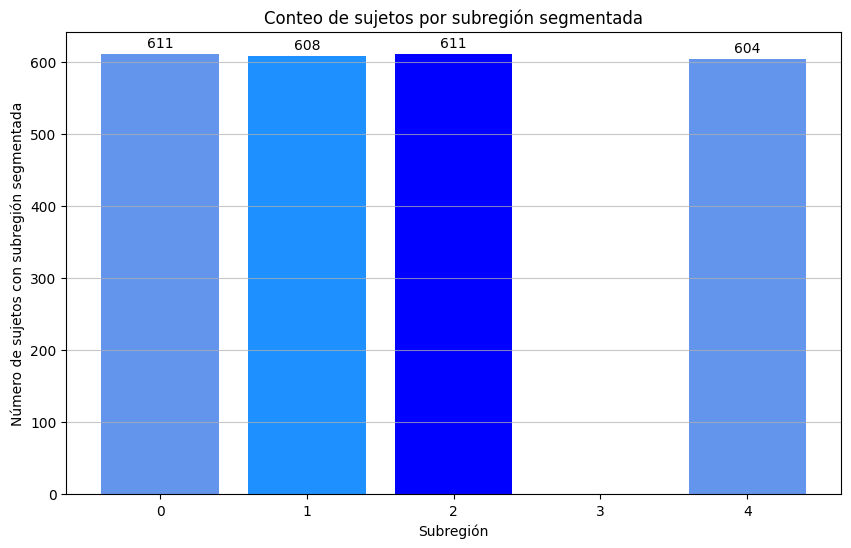

Sujetos que faltan subregiones:
Subregión 1 falta en: UPENN-GBM-00201_11_automated_approx_segm.nii.gz, UPENN-GBM-00354_11_automated_approx_segm.nii.gz, UPENN-GBM-00397_11_automated_approx_segm.nii.gz
Subregión 4 falta en: UPENN-GBM-00229_11_automated_approx_segm.nii.gz, UPENN-GBM-00315_11_automated_approx_segm.nii.gz, UPENN-GBM-00354_11_automated_approx_segm.nii.gz, UPENN-GBM-00380_11_automated_approx_segm.nii.gz, UPENN-GBM-00397_11_automated_approx_segm.nii.gz, UPENN-GBM-00444_11_automated_approx_segm.nii.gz, UPENN-GBM-00462_11_automated_approx_segm.nii.gz


In [23]:
# Ruta a la carpeta que contiene los archivos .nii.gz
carpeta_mascaras = r'C:\Users\santi\Desktop\Tumor_segmetation\Data\seg'

# Nombres de las subregiones esperadas
subregiones_esperadas = {0, 1, 2, 4}

# Diccionario para contar la cantidad de sujetos que tienen cada subregión
conteo_subregiones = {sub: 0 for sub in subregiones_esperadas}
# Diccionario para rastrear los sujetos que faltan subregiones
sujetos_faltantes = {sub: [] for sub in subregiones_esperadas}

# Recorre cada archivo en la carpeta
for archivo in os.listdir(carpeta_mascaras):
    if archivo.endswith('.nii.gz'):
        ruta_archivo = os.path.join(carpeta_mascaras, archivo)
        
        # Cargar la imagen usando nibabel
        img = nib.load(ruta_archivo)
        
        # Obtener el array de datos de la imagen
        data_array = img.get_fdata()
        
        # Obtener los valores únicos en el array
        valores_unicos = set(np.unique(data_array))
        
        # Contar las subregiones presentes en esta máscara
        for sub in subregiones_esperadas:
            if sub in valores_unicos:
                conteo_subregiones[sub] += 1
            else:
                sujetos_faltantes[sub].append(archivo)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))  # Ajustar el tamaño del gráfico (ancho=10, alto=6)
bars = ax.bar(conteo_subregiones.keys(), conteo_subregiones.values(), color=['cornflowerblue','dodgerblue','blue'])

# Agregar etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento hacia arriba
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Subregión')
plt.ylabel('Número de sujetos con subregión segmentada')
plt.title('Conteo de sujetos por subregión segmentada')
plt.grid(axis='y', alpha=0.7)
plt.show()

# Imprimir los sujetos que faltan subregiones
print("Sujetos que faltan subregiones:")
for sub, sujetos in sujetos_faltantes.items():
    if sujetos:
        print(f"Subregión {sub} falta en: {', '.join(sujetos)}")
